In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Reading the data
# train_path = r'C:\dev\env\movie-genres-classification-train.csv'
# df = pd.read_csv(train_path)
path = r'C:\dev\env\movie_genre_by_subtitle_df.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


In [4]:
# other data exploration
df.info() 
df.isnull().sum()
# There is no nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22579 entries, 0 to 22578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      22579 non-null  int64 
 1   text    22579 non-null  object
 2   genre   22579 non-null  object
dtypes: int64(1), object(2)
memory usage: 529.3+ KB


id       0
text     0
genre    0
dtype: int64

In [5]:
classes_num = len(df['genre'].unique())
classes_num

9

In [6]:
df['genre'].unique()

array(['thriller', 'comedy', 'drama', 'action', 'sci-fi', 'other',
       'romance', 'horror', 'adventure'], dtype=object)

In [7]:
le=LabelEncoder()
cat=le.fit_transform(df['genre'])
le.classes_
le.inverse_transform([0,1,2,3,4,5,6,7,8])

array(['action', 'adventure', 'comedy', 'drama', 'horror', 'other',
       'romance', 'sci-fi', 'thriller'], dtype=object)

In [8]:
dict(zip(le.inverse_transform([0,1,2,3,4,5,6,7,8]),[0,1,2,3,4,5,6,7,8]))
df['enc_genre'] = cat

In [9]:
df['genre'].value_counts()
df['enc_genre'].value_counts()

3    8873
8    6824
2    2941
0    2392
7     613
4     456
5     270
1     147
6      63
Name: enc_genre, dtype: int64

In [10]:
all_genres = nltk.FreqDist(df['genre']) 
all_genres

FreqDist({'drama': 8873, 'thriller': 6824, 'comedy': 2941, 'action': 2392, 'sci-fi': 613, 'horror': 456, 'other': 270, 'adventure': 147, 'romance': 63})

In [11]:
# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 'Count': list(all_genres.values())})

In [12]:
all_genres_df

,Genre,Count
0,thriller,6824
1,comedy,2941
2,drama,8873
3,action,2392
4,sci-fi,613
5,other,270
6,romance,63
7,horror,456
8,adventure,147


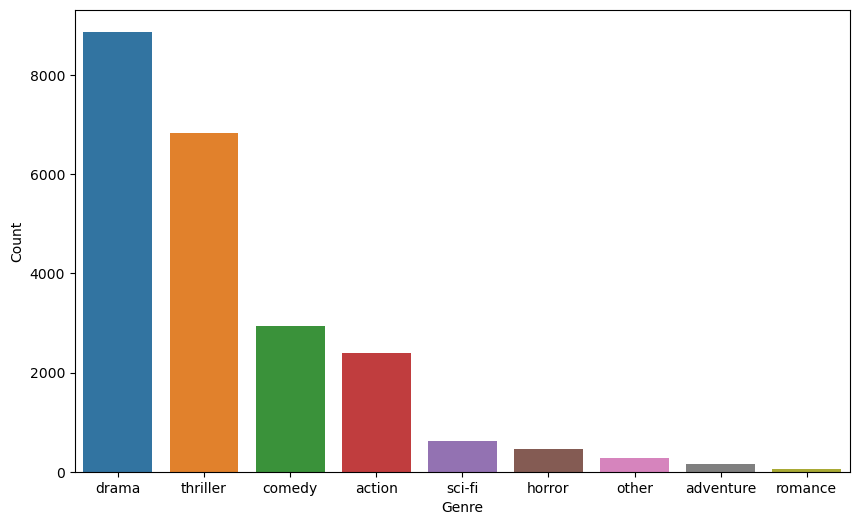

In [13]:
g = all_genres_df.nlargest(columns="Count", n = all_genres_df.shape[0]) 
plt.figure(figsize=(10,6)) 
ax = sns.barplot(data=g, x= "Genre", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

In [14]:
# Imbalanced Data
# I should deal with this imbalanced data!!!

In [15]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [16]:
df['clean_text'] = df['text'].apply(lambda x: clean_text(x))

In [17]:
df.head()

,id,text,genre,enc_genre,clean_text
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller,8,eady dead maybe even wishing he was int nd flo...
1,2,"t, summa cum laude and all. And I'm about to l...",comedy,2,t summa cum laude and all and im about to laun...
2,3,"up Come, I have a surprise.... She takes him ...",drama,3,up come i have a surprise she takes him by the...
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller,8,ded by the two detectives int jeffs apartment ...
4,5,"nd dismounts, just as the other children reach...",drama,3,nd dismounts just as the other children reach ...


In [18]:
def freq_words(x, terms = 10): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(8,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.bar_label(ax.containers[0], fmt='%d')
  ax.set(ylabel = 'Word') 
  plt.show()

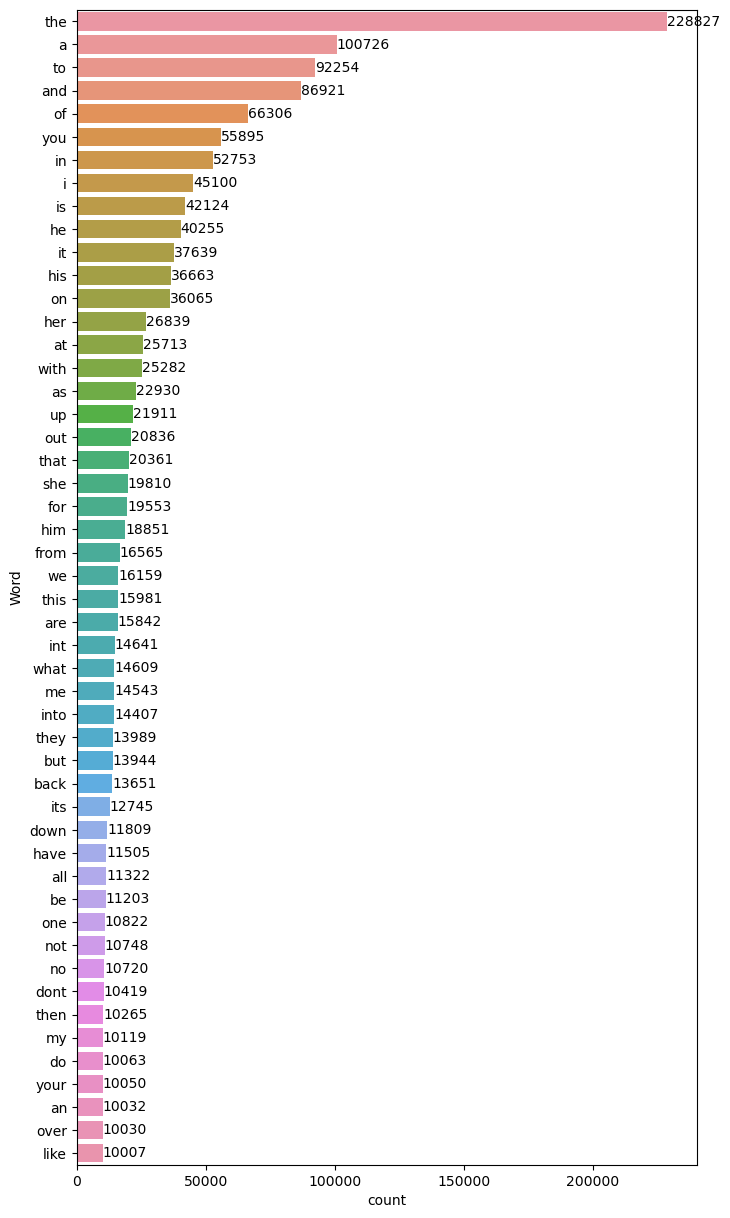

In [19]:
# print 100 most frequent words 
freq_words(df['clean_text'], 50)

In [20]:
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [21]:
# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

In [22]:
df['clean_text'] = df['clean_text'].apply(lambda x: remove_stopwords(x))

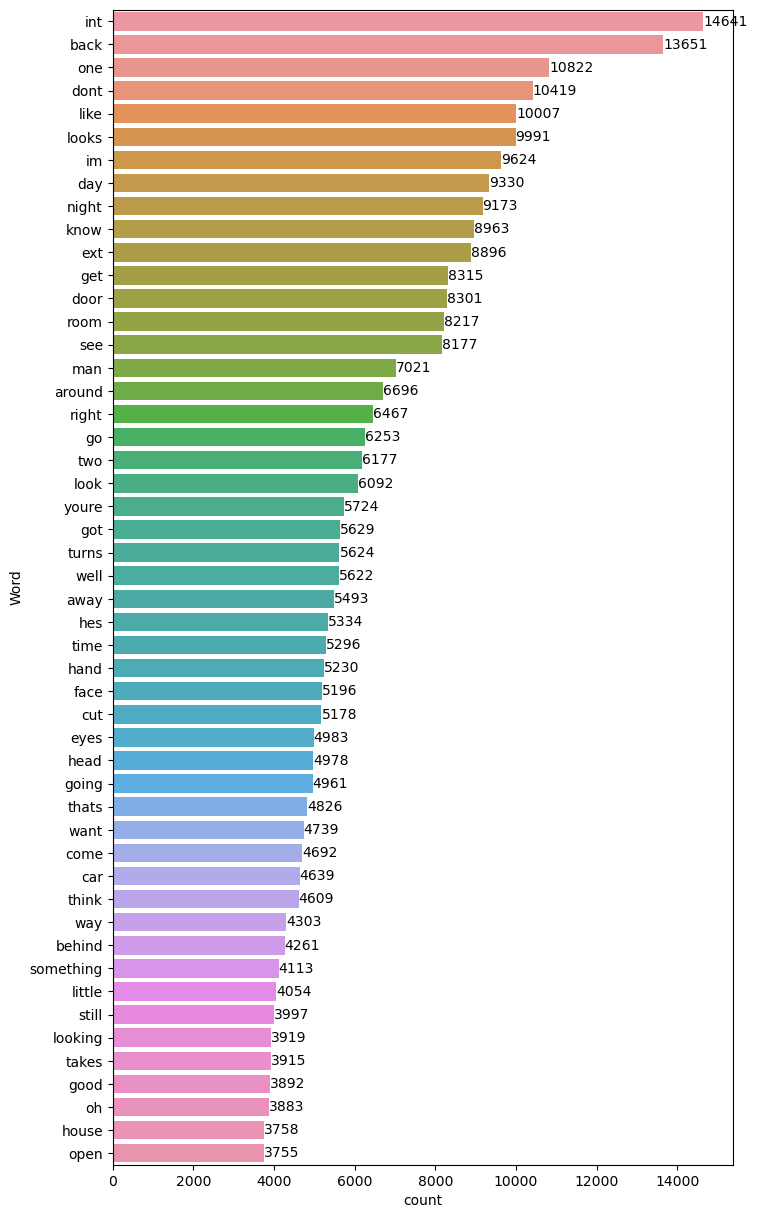

In [23]:
freq_words(df['clean_text'], 50)

In [24]:
# Methods: TF-IDF, Bag-of-Words, word2vec, GloVe, ELMo

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [25]:
# split dataset into training and validation set
# xtrain, xval, ytrain, yval = train_test_split(df['clean_text'], y, test_size=0.2, random_state=9)
xtrain, xval, ytrain, yval = train_test_split(df[['id','clean_text']], df['genre'], test_size=0.2, random_state=9)

In [26]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain['clean_text'])
xval_tfidf = tfidf_vectorizer.transform(xval['clean_text'])

In [27]:
xtrain_tfidf

<18063x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 1286455 stored elements in Compressed Sparse Row format>

In [28]:
xval_tfidf

<4516x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 319685 stored elements in Compressed Sparse Row format>

In [29]:
18063+4516

22579

In [30]:
from sklearn.linear_model import LogisticRegression
# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier
# Performance metric
from sklearn.metrics import accuracy_score, confusion_matrix

In [31]:
# Considered as Binary Relevance - one-vs-all problem
lr = LogisticRegression()
LRC = OneVsRestClassifier(lr)

In [32]:
# fit model on train data
LRC.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [33]:
# make predictions for validation set
y_pred = LRC.predict(xval_tfidf)

In [34]:
print('Validation accuracy for LR classifier :', round(accuracy_score(yval, y_pred)*100, 2), '%')

Validation accuracy for LR classifier : 87.75 %


In [35]:
from sklearn.ensemble import RandomForestClassifier
# Fitting Random Forest Classification to the Training set
# classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
RFC = RandomForestClassifier()
RFC.fit(xtrain_tfidf, ytrain)
y_pred2 = RFC.predict(xval_tfidf)
print('Validation accuracy for Random Forest classifier :', round(accuracy_score(yval, y_pred2)*100, 2), '%')

Validation accuracy for Random Forest classifier : 75.91 %


In [36]:
yval.value_counts()

drama        1784
thriller     1338
comedy        578
action        486
sci-fi        135
horror         99
other          50
adventure      33
romance        13
Name: genre, dtype: int64

In [37]:
pd.DataFrame(y_pred).value_counts()

drama        2004
thriller     1444
comedy        478
action        412
sci-fi         71
horror         46
other          32
adventure      25
romance         4
dtype: int64

In [38]:
pd.DataFrame(y_pred2).value_counts()

drama        2370
thriller     1341
comedy        345
action        340
sci-fi         39
other          36
adventure      28
horror         11
romance         6
dtype: int64

In [39]:
round(accuracy_score(y_pred, yval)*100, 2)

87.75

In [40]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

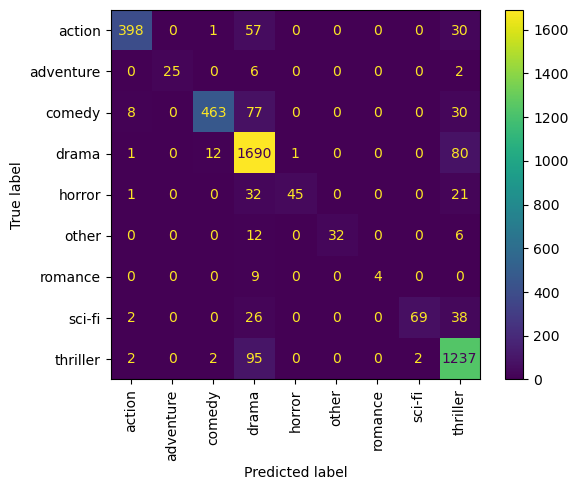

In [41]:
ConfusionMatrixDisplay.from_predictions(yval, y_pred, xticks_rotation="vertical")
plt.show()

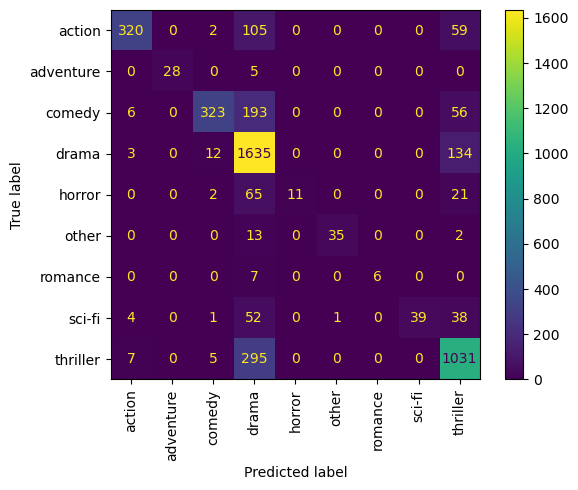

In [42]:
ConfusionMatrixDisplay.from_predictions(yval, y_pred2, xticks_rotation="vertical")
plt.show()

In [43]:
# pd.DataFrame(metrics.confusion_matrix(y_test,y_pred),columns = ['Drama(0)','Mystery/Adventure(1)','Action(2)','Thriller(3)','Comedy/Romance(4)','Scifi(5)'])
# pd.DataFrame(metrics.confusion_matrix(yval,y_pred))
print(metrics.confusion_matrix(yval,y_pred), '\n')
print(metrics.confusion_matrix(yval,y_pred2))

[[ 398    0    1   57    0    0    0    0   30]
 [   0   25    0    6    0    0    0    0    2]
 [   8    0  463   77    0    0    0    0   30]
 [   1    0   12 1690    1    0    0    0   80]
 [   1    0    0   32   45    0    0    0   21]
 [   0    0    0   12    0   32    0    0    6]
 [   0    0    0    9    0    0    4    0    0]
 [   2    0    0   26    0    0    0   69   38]
 [   2    0    2   95    0    0    0    2 1237]] 

[[ 320    0    2  105    0    0    0    0   59]
 [   0   28    0    5    0    0    0    0    0]
 [   6    0  323  193    0    0    0    0   56]
 [   3    0   12 1635    0    0    0    0  134]
 [   0    0    2   65   11    0    0    0   21]
 [   0    0    0   13    0   35    0    0    2]
 [   0    0    0    7    0    0    6    0    0]
 [   4    0    1   52    0    1    0   39   38]
 [   7    0    5  295    0    0    0    0 1031]]


In [44]:
xtrain, xval, ytrain, yval = train_test_split(df[['id','clean_text']], df['genre'], test_size=0.2, random_state=9)

In [45]:
xtrain

,id,clean_text
6002,7538,bond hold terrace set back nd floor twilight s...
895,1113,stops another door blasts lock riot gun flings...
2308,2898,n special sissy cheers welcome letter brought ...
15415,19272,il raouls direction say minute raoul sighs imp...
13617,17054,powerful say didnt get lured take responsibili...
...,...,...
4673,5855,like happen struggling find words nicola smile...
5014,6279,finish testifying youll disbarred int gonzos o...
9979,12540,old man earn keep stephen pissed dad dennis yo...
501,639,front truck mr jones slams brakes debo craig g...


In [46]:
xtrain_tfidf.toarray()
pd.DataFrame.sparse.from_spmatrix(xtrain_tfidf).shape

(18063, 10000)

In [47]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [48]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain['clean_text'])
xval_tfidf = tfidf_vectorizer.transform(xval['clean_text'])

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import numpy as np

In [50]:
xval

,id,clean_text
14413,18045,supper jake care join us gittes thanks curly g...
16998,21243,red order shellbacks crew cheer embrace skippe...
5155,6474,e sees eleanor grant brendan grant surrounded ...
15449,19320,skipper int bubble owens startled hear michael...
4868,6106,let oh god help somebody goddamnit shape close...
...,...,...
11322,14211,im han aims pistol princess groggy conscious t...
21988,27436,se tentatively jim contd derek derek uh ethics...
15897,19886,mason mason holds like string wind chimes maso...
10358,13012,urman family donnie donnie dont think fucking ...


In [51]:
xtrain_tfidf.toarray().shape

(18063, 10000)

In [52]:
ytrain

6002     thriller
895      thriller
2308        drama
15415       drama
13617      comedy
           ...   
4673        drama
5014        drama
9979        drama
501        comedy
20828    thriller
Name: genre, Length: 18063, dtype: object

In [53]:
xval_tfidf

<4516x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 319685 stored elements in Compressed Sparse Row format>

In [54]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
ytrain_nn = label_encoder.fit_transform(ytrain)
yval_nn = label_encoder.transform(yval)


In [55]:
ytrain

6002     thriller
895      thriller
2308        drama
15415       drama
13617      comedy
           ...   
4673        drama
5014        drama
9979        drama
501        comedy
20828    thriller
Name: genre, Length: 18063, dtype: object

In [56]:
# Convert NumPy arrays to PyTorch tensors
xtrain_tfidf_nn = torch.tensor(xtrain_tfidf.toarray(), dtype=torch.float)
ytrain_nn = torch.tensor(ytrain_nn, dtype=torch.long)
xval_tfidf_nn = torch.tensor(xval_tfidf.toarray(), dtype=torch.float)
yval_nn = torch.tensor(yval_nn, dtype=torch.long)

In [57]:
# Prepare the dataset and DataLoader for training and validation sets
train_dataset = data.TensorDataset(xtrain_tfidf_nn, ytrain_nn)
val_dataset = data.TensorDataset(xval_tfidf_nn, yval_nn)
batch_size = 32
train_loader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [58]:
# Step 2: Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [59]:
# Step 3: Implement the training loop with validation loss and accuracy calculation
def train(model, criterion, optimizer, train_loader, val_loader, num_epochs, patience=3):
    train_losses = []  # Store training losses for plotting
    val_losses = []    # Store validation losses for plotting
    train_accuracies = []  # Store training accuracies for plotting
    val_accuracies = []    # Store validation accuracies for plotting

    best_val_loss = float('inf')
    no_improvement = 0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        epoch_train_accuracy = correct_train / total_train

        train_losses.append(epoch_loss)  # Store training loss for each epoch
        train_accuracies.append(epoch_train_accuracy)  # Store training accuracy for each epoch
        print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_train_accuracy:.4f}")

        # Calculate validation loss and accuracy
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        epoch_val_accuracy = correct_val / total_val

        val_losses.append(val_loss)  # Store validation loss for each epoch
        val_accuracies.append(epoch_val_accuracy)  # Store validation accuracy for each epoch
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {epoch_val_accuracy:.4f}")

        # Early stopping based on validation loss
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            no_improvement = 0
            torch.save(model.state_dict(), "best_model.pt")  # Save the model with the best validation loss
        else:
            no_improvement += 1
            if no_improvement >= patience:
                print("Early stopping! No improvement in validation loss.")
                break

    return train_losses, val_losses, train_accuracies, val_accuracies

In [60]:
# Step 4: Evaluate the trained network on the validation set
def evaluate_model(model, val_loader):
    model.eval()
    predictions = []

    with torch.no_grad():
        for inputs, _ in val_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            predictions.extend(predicted.tolist())

    return predictions

In [61]:
# Main function
if __name__ == "__main__":
    input_size = xtrain_tfidf_nn.shape[1]  # Number of features in the input
    hidden_size = 128
    num_classes = len(np.unique(ytrain_nn))

    model = NeuralNetwork(input_size, hidden_size, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    num_epochs = 50
    patience = 5  # Number of epochs with no improvement after which training will be stopped
    train_losses, val_losses, train_accuracies, val_accuracies = train(model, criterion, optimizer, train_loader, val_loader, num_epochs, patience)

Epoch 1/50, Training Loss: 1.0377, Training Accuracy: 0.6676
Validation Loss: 0.4620, Validation Accuracy: 0.8687
Epoch 2/50, Training Loss: 0.2230, Training Accuracy: 0.9469
Validation Loss: 0.2450, Validation Accuracy: 0.9240
Epoch 3/50, Training Loss: 0.0607, Training Accuracy: 0.9924
Validation Loss: 0.2132, Validation Accuracy: 0.9256
Epoch 4/50, Training Loss: 0.0217, Training Accuracy: 0.9992
Validation Loss: 0.2136, Validation Accuracy: 0.9238
Epoch 5/50, Training Loss: 0.0099, Training Accuracy: 0.9999
Validation Loss: 0.2161, Validation Accuracy: 0.9240
Epoch 6/50, Training Loss: 0.0053, Training Accuracy: 0.9999
Validation Loss: 0.2227, Validation Accuracy: 0.9229
Epoch 7/50, Training Loss: 0.0031, Training Accuracy: 0.9999
Validation Loss: 0.2364, Validation Accuracy: 0.9236
Epoch 8/50, Training Loss: 0.0019, Training Accuracy: 0.9999
Validation Loss: 0.2369, Validation Accuracy: 0.9236
Early stopping! No improvement in validation loss.


Predicted labels: ['drama' 'drama' 'comedy' ... 'thriller' 'drama' 'drama']


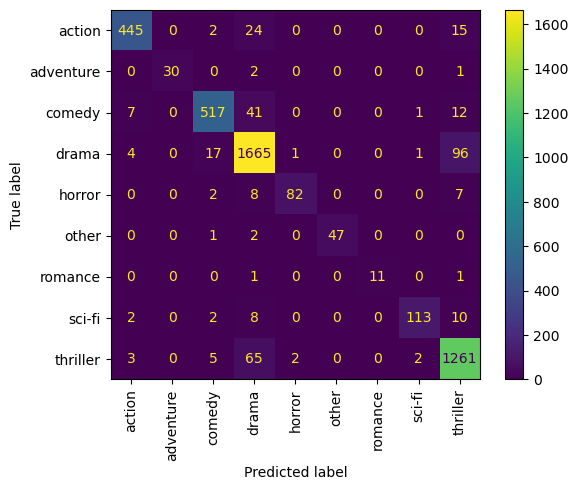

In [62]:
# Step 5: Decode the predictions back to categorical labels
predictions = evaluate_model(model, val_loader)
original_labels = label_encoder.inverse_transform(predictions)
print("Predicted labels:", original_labels)

ConfusionMatrixDisplay.from_predictions(yval, original_labels, xticks_rotation="vertical")
plt.show()

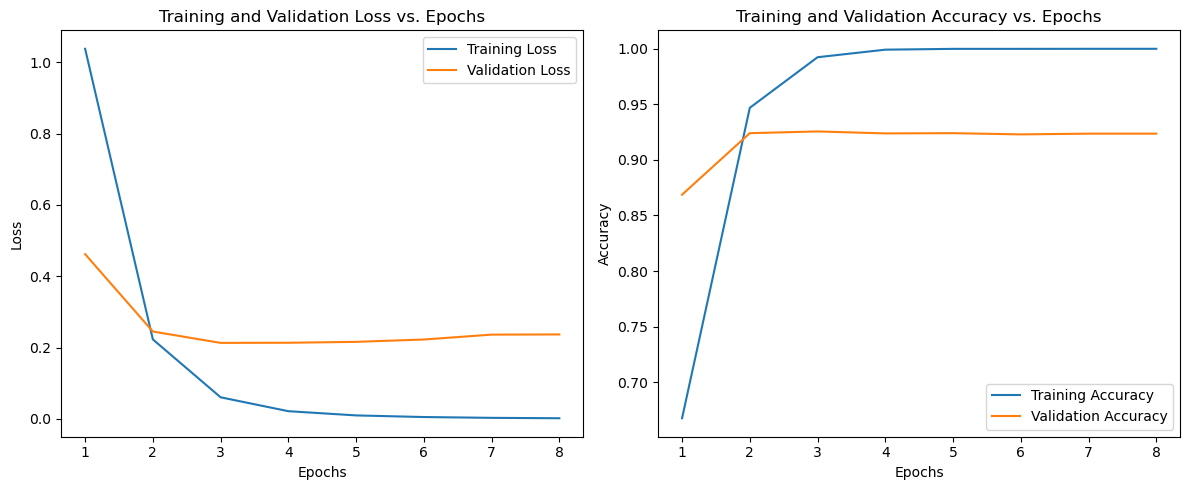

In [63]:
# Step 6: Plot the loss and accuracy vs. epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Training Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss vs. Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label="Training Accuracy")
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy vs. Epochs")
plt.legend()

plt.tight_layout()
plt.show()

## Thanks!

In [41]:
# # Loading and predicting test data  - only if we take some samples also for test
# test_path = r'C:\Users\nati_\OneDrive\Desktop\Market Beyond\movie-genres-classification-test.csv'

# test_df = pd.read_csv(test_path, engine='python', error_bad_lines=False) 

# test_df['clean_text'] = test_df['text'].apply(lambda x: clean_text(x))
# # freq_words(test_df['clean_text'], 100)
# test_df['clean_text'] = test_df['clean_text'].apply(lambda x: remove_stopwords(x))
# # freq_words(test_df['clean_text'], 100)
# xtest_tfidf = tfidf_vectorizer.fit_transform(test_df['clean_text'])


# y_test_pred_LR = pd.DataFrame({'id': test_df['id'], 'genre': LRC.predict(xtest_tfidf)})  # Logistic Regression
# y_test_pred_RF = pd.DataFrame({'id': test_df['id'], 'genre': RFC.predict(xtest_tfidf)}) # Random Forest



# pd.DataFrame(y_test_pred_LR).to_csv(r'C:\Users\nati_\y_test_pred_LR.csv')
# pd.DataFrame(y_test_pred_RF).to_csv(r'C:\Users\nati_\y_test_pred_RF.csv')

# y_test_pred_LR['genre'].unique().shape
# y_test_pred_RF['genre'].unique().shape
